In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [2]:
#functions removes columns that have a correlation below the threshold (10 in this instance)
def dropUnCorr(df, compareCol, threshold):
    new_df = df.drop(compareCol, 1)
    correlation = new_df.corrwith(df[compareCol])
    correlation = correlation.abs().mul(100)
    tempList = list(new_df.columns)
    for i in range(len(correlation)):
        if correlation[i] < threshold:
            del df[tempList[i]]
             
    return [df,correlation]

In [3]:
wdir = r'C:\Users\noaht\Documents\Data_Mining\Project 2'
os.chdir(wdir)
df = pd.read_csv(wdir + r'\filtAirData.csv')


In [4]:
df.shape

(119204, 25)

In [5]:
m_df = df.copy()

In [6]:
m_df.head(30)
# 1 = male 0 = female 
# 0 = loyal Customer, 1 = disloyal Customer 
# 0 = Businesss Tavel, 1 = Persoal Travel
# 0 = Business, 1 = Eco, 2 = Eco Plus 


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1
3,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,1
4,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,1
5,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,1
6,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,1
7,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,1
8,10,47583,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,...,3,3,4,3,1,3,4,29,19.0,1
9,11,115550,Female,Loyal Customer,33,Business travel,Business,325,2,5,...,2,2,2,2,3,2,4,18,7.0,0


In [7]:
#replace columns with string types with integers 
m_df['Gender']=m_df['Gender'].astype('category').cat.codes
m_df['Customer Type']=m_df['Customer Type'].astype('category').cat.codes
m_df['Class']=m_df['Class'].astype('category').cat.codes
m_df['Type of Travel']=m_df['Type of Travel'].astype('category').cat.codes

m_df.shape

(119204, 25)

In [8]:
Correlation = m_df.drop('satisfaction', 1).corrwith(m_df.satisfaction)
Correlation = Correlation.abs().mul(100)
dope = list(m_df.columns)
cool = m_df.copy()
print(cool.shape)
x = dropUnCorr(cool,'satisfaction', 10)

(119204, 25)


C:\Users\noaht\AppData\Local\Temp/ipykernel_32872/574509034.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Correlation = m_df.drop('satisfaction', 1).corrwith(m_df.satisfaction)
C:\Users\noaht\AppData\Local\Temp/ipykernel_32872/2442886811.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = df.drop(compareCol, 1)


In [9]:
tempList =  list(m_df.drop('satisfaction', 1).columns.copy())
trunkatedColNames = []
for string in tempList:
    if len(string) > 20: 
        trunkatedColNames.append(string[:17] + '...')
    else:
        trunkatedColNames.append(string)
print(len(trunkatedColNames))
for string in trunkatedColNames:
    print(len(string))

24
10
2
6
13
3
14
5
15
20
20
20
13
14
15
12
20
16
16
16
15
16
11
20
20


C:\Users\noaht\AppData\Local\Temp/ipykernel_32872/2145642709.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tempList =  list(m_df.drop('satisfaction', 1).columns.copy())


In [10]:
data = {'Data': trunkatedColNames, 'Correlation': list(x[1])}
CorrData = pd.DataFrame(data)


error could not save file column:  


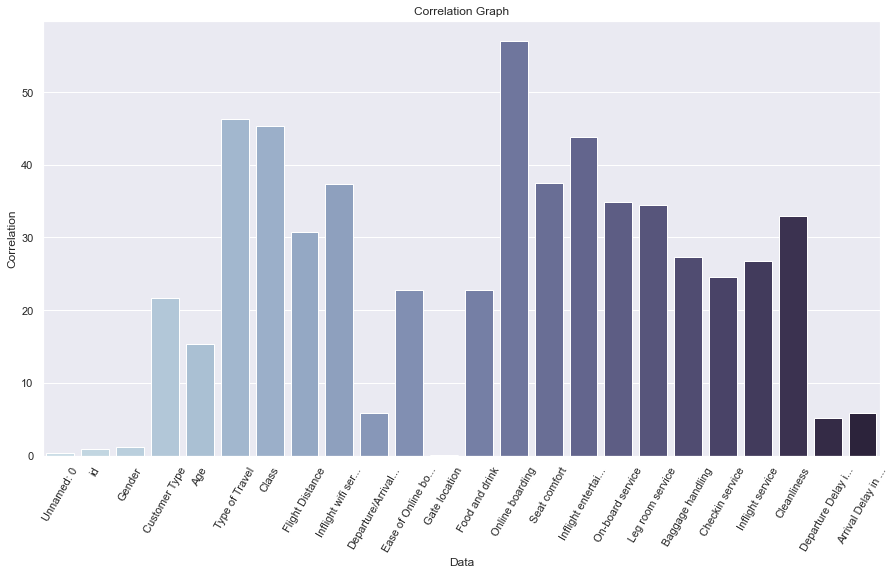

In [67]:
ax = sns.barplot(x = 'Data', y = 'Correlation', data = CorrData, palette="ch:s=.25,rot=-.25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set(title='Correlation Graph', xlabel='Data')
sns.set(rc={"figure.figsize":(15,8)}) 
try: 
    sns.savefig( 'Correlation' + '.png')
except:
    print("error could not save file column:  ")

In [12]:
CorrData.head(20)

,Data,Correlation
0,Unnamed: 0,0.382969
1,id,0.939188
2,Gender,1.185330
3,Customer Type,21.651832
4,Age,15.286791
5,Type of Travel,46.315264
6,Class,45.333076
7,Flight Distance,30.733738
8,Inflight wifi ser...,37.365573
9,Departure/Arrival...,5.848871


### Split Data Set 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [14]:
x = m_df.drop('satisfaction', axis = 1 )
y = m_df['satisfaction']
len(x) == len(y)

True

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3162)

### Pipline Data 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [17]:
#establish pipelines 
# in order of what I think will preform the best 

#Random Forest 
pipe_forest = Pipeline([('scalar', StandardScaler()), ('clf', RandomForestClassifier(n_estimators = 10))])

#Decision Tree 
pipe_tree = Pipeline([(('scalar'), StandardScaler()), ('clf', tree.DecisionTreeClassifier())])

#KNN 
pipe_knn = Pipeline([(('scalar'), StandardScaler()), ('clf', KNeighborsClassifier())])
                     
#Support Vector Machine 
pipe_svm = Pipeline([(('scalar'), StandardScaler()), ('clf', svm.SVC())])

#Niave Bayes
pipe_bayes = Pipeline([(('scalar'), StandardScaler()), ('clf', GaussianNB())])

#Create list of Pipes 
druzhba = [pipe_forest, pipe_tree, pipe_knn, pipe_svm, pipe_bayes]

#Create dic of pipes 
pipe_dick = {0 : 'Random Forest', 1 : 'Decision Tree', 2 : 'KNN' , 3 : 'Support Vecor Machine', 4 : 'Naive Bayes '}

### Results and Testing 

In [18]:
results = []
F1_scores = {'Random Forest': '' , 'Decision Tree': '' , 'KNN' : '' , 'Support Vecor Machine' : '' , 'Naive Bayes' : ''}
for i in range(len(druzhba)): 
    druzhba[i].fit(x_train, y_train)
    results.append(pipe_dick[i] + ' Score = ' +  str((druzhba[i].score(x_test, y_test) * 100)))
    F1_scores[pipe_dick[i]] = cross_val_score(druzhba[i], x_train, y_train, scoring="f1")
for result in results:
    print(result)
F1_final = pd.DataFrame(F1_scores)

Random Forest Score = 95.66858676807784
Decision Tree Score = 94.76818969856272
KNN Score = 93.81186734522677
Support Vecor Machine Score = 95.61825401263911
Naive Bayes  Score = 88.33118953078687


In [33]:
del F1_final['Naive Bayes']

In [70]:
F1_final

,Random Forest,Decision Tree,KNN,Support Vecor Machine,Naive Bayes
0,0.945137,0.929321,0.920920,0.945771,0.855699
1,0.949321,0.936161,0.922345,0.944401,0.858077
2,0.950321,0.937584,0.924440,0.948197,0.856810
3,0.947384,0.934747,0.922391,0.946662,0.858774
4,0.950441,0.937461,0.926083,0.949322,0.860827


In [69]:
temp =  {'Random Forest': F1_final['Random Forest'].mean() , 'Decision Tree': F1_final['Decision Tree'].mean() , 'KNN' : F1_final['KNN'].mean() , 'Support Vector Machine' : F1_final['Support Vecor Machine'].mean() , 'Naive Bayes' : F1_final['Naive Bayes '].mean()}
mean_f1 = pd.DataFrame(data = temp, index =[0] ).transpose()
mean_f1['Data'] = mean_f1.index
mean_f1 = mean_f1.rename(columns = { 0 : 'F1 Score'})
mean_f1

,F1 Score,Data
Random Forest,0.948521,Random Forest
Decision Tree,0.935055,Decision Tree
KNN,0.923236,KNN
Support Vector Machine,0.946870,Support Vector Machine
Naive Bayes,0.858038,Naive Bayes


error could not save file


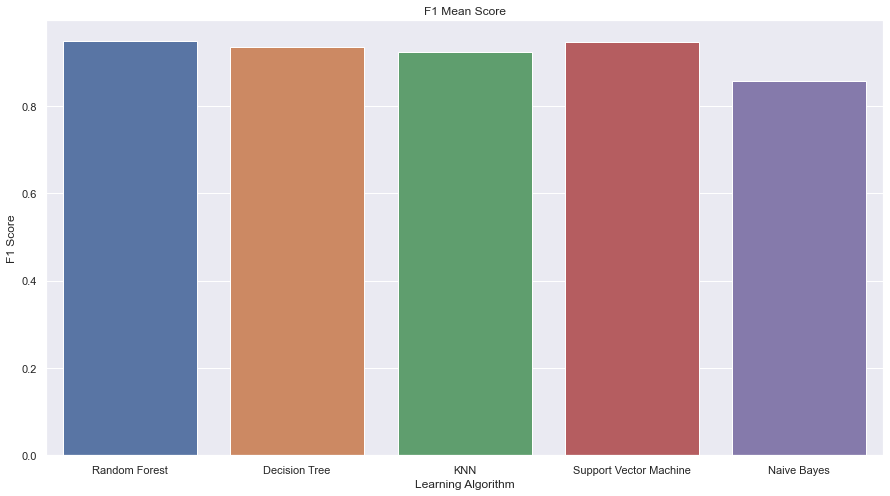

In [68]:
f1_plot = sns.barplot(x = 'Data', y = 'F1 Score', data = mean_f1, )
f1_plot.set(title='F1 Mean Score', xlabel = 'Learning Algorithm')
try: 
    f1_plot.savefig(xlab + 'pct' + '.png')
except:
    print("error could not save file")